<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-11-01 05:16:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  44.0MB/s    in 0.8s    

2022-11-01 05:16:09 (44.0 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [9]:
# your code goes here
df = pd.read_sql("SELECT * FROM master",conn)
df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


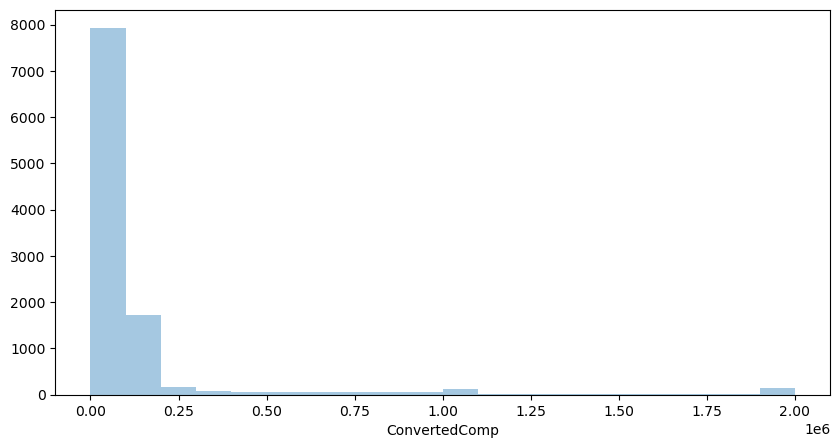

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(a=df['ConvertedComp'],bins=20,kde=False)
plt.show()

### Box Plots


Plot a box plot of `Age.`


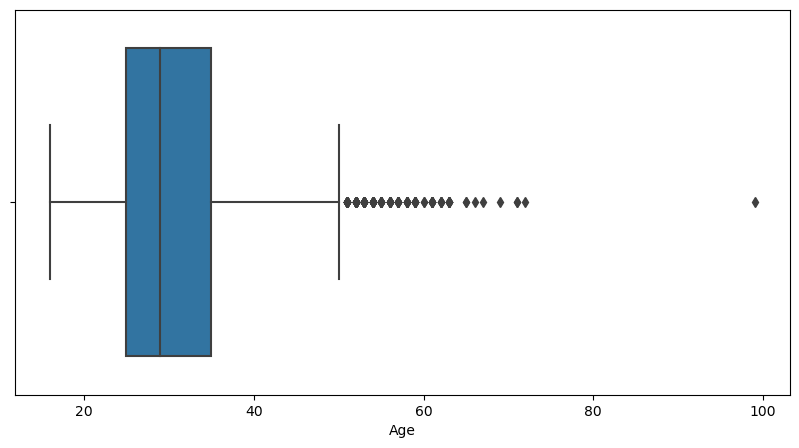

In [13]:
# your code goes here
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Age,data=df)
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


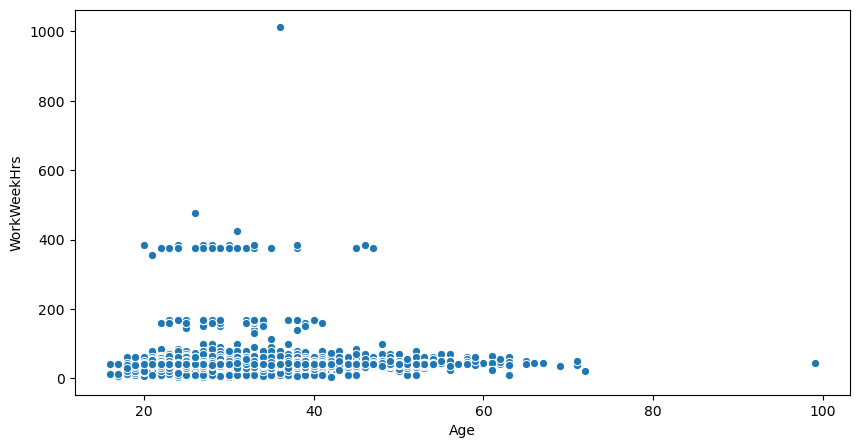

In [14]:
# your code goes here
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.WorkWeekHrs, data=df)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


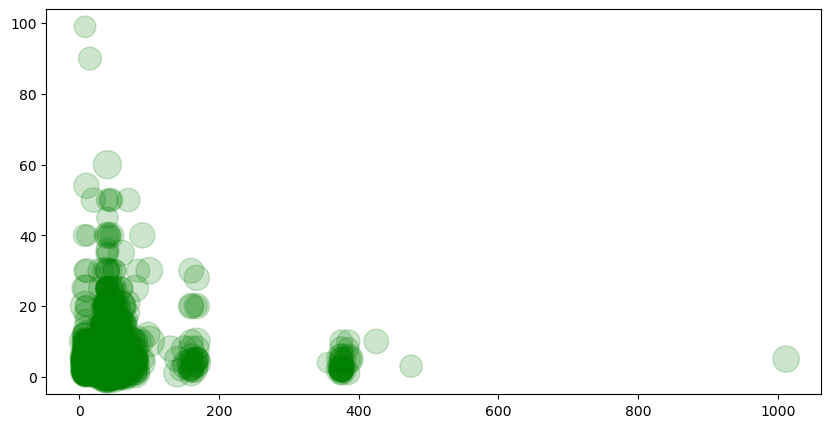

In [15]:
# your code goes here
plt.figure(figsize=(10,5))
plt.scatter(x=df.WorkWeekHrs, y=df.CodeRevHrs, c='green', alpha=0.2, s=df.Age*10)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [16]:
# your code goes here
df2 = pd.read_sql("SELECT * FROM DatabaseWorkedWith", conn)
df2.columns

Index(['Respondent', 'DatabaseWorkedWith'], dtype='object')

In [17]:
df2

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [19]:
y=pd.DataFrame(df2.groupby('DatabaseWorkedWith').count())
y               

,Respondent
DatabaseWorkedWith,
Cassandra,397
Couchbase,250
DynamoDB,831
Elasticsearch,1954
Firebase,1314
MariaDB,1709
Microsoft SQL Server,4110
MongoDB,3016
MySQL,5469


In [20]:
y.sort_values(by="Respondent", ascending=False)

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016
Redis,2508
Elasticsearch,1954
Oracle,1744
MariaDB,1709


In [21]:
y=y.nlargest(5,"Respondent")
y

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016


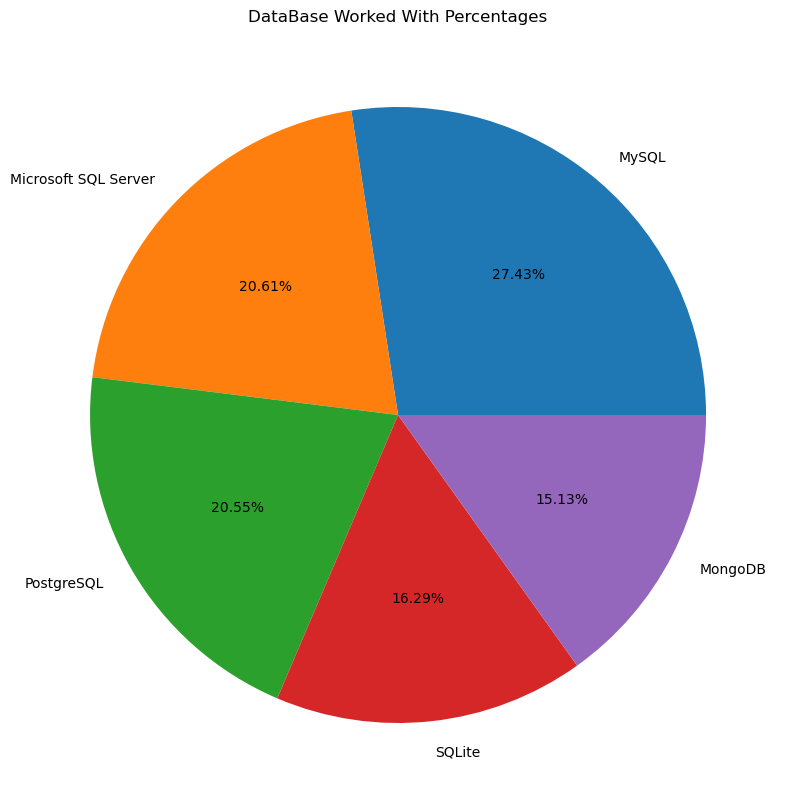

In [22]:
plt.figure(figsize=(10,10))
plt.pie(y.Respondent, labels=['MySQL','Microsoft SQL Server','PostgreSQL','SQLite','MongoDB'],
       autopct='%.2f%%')
plt.title("DataBase Worked With Percentages")
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [23]:
# your code goes here
df['WorkWeekHrs'].median()

40.0

In [24]:
df.CodeRevHrs.median()

4.0

In [25]:
age = df[(df["Age"] >= 30.0) & (df["Age"] <= 35.0)]
age

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
5,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,31.0,No,Yes,Too long,Easy
11,11,26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,34.0,No,No,Appropriate in length,Easy
12,12,29,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,32.0,No,Yes,Appropriate in length,Easy
18,18,49,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Serbia,"Yes, full-time",Some college/university study without earning ...,...,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Just as welcome now as I felt last year,34.0,No,Yes,Too long,Easy
22,22,56,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,China,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not at all",Just as welcome now as I felt last year,33.0,No,Yes,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,11385,25120,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Argentina,"Yes, part-time","Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,32.0,No,No,Too long,Neither easy nor difficult
11391,11391,25133,I am a developer by profession,No,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Belgium,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,32.0,No,Yes,Too long,Easy
11392,11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","No, not really",Somewhat less welcome now than last year,32.0,No,No,Appropriate in length,Easy
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A l

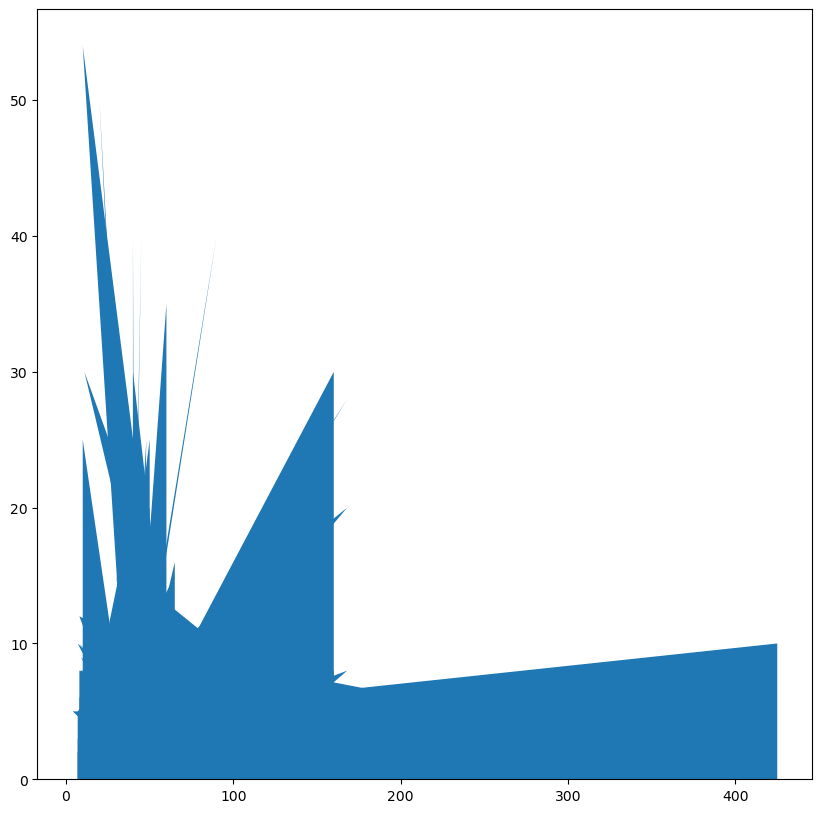

In [26]:
plt.figure(figsize=(10,10))
plt.stackplot(age.WorkWeekHrs, age.CodeRevHrs)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [29]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [30]:
age2 = df[(df["Age"] >= 45.0) & (df["Age"] <= 60.0)]
age2.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
7,7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,...,A few times per week,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
50,50,111,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,54.0,No,Yes,Too long,Easy
66,66,144,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed part-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Somewhat less welcome now than last year,47.0,No,Yes,Too long,Easy
75,75,164,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
93,93,202,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,...,Multiple times per day,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,45.0,No,No,Appropriate in length,Easy


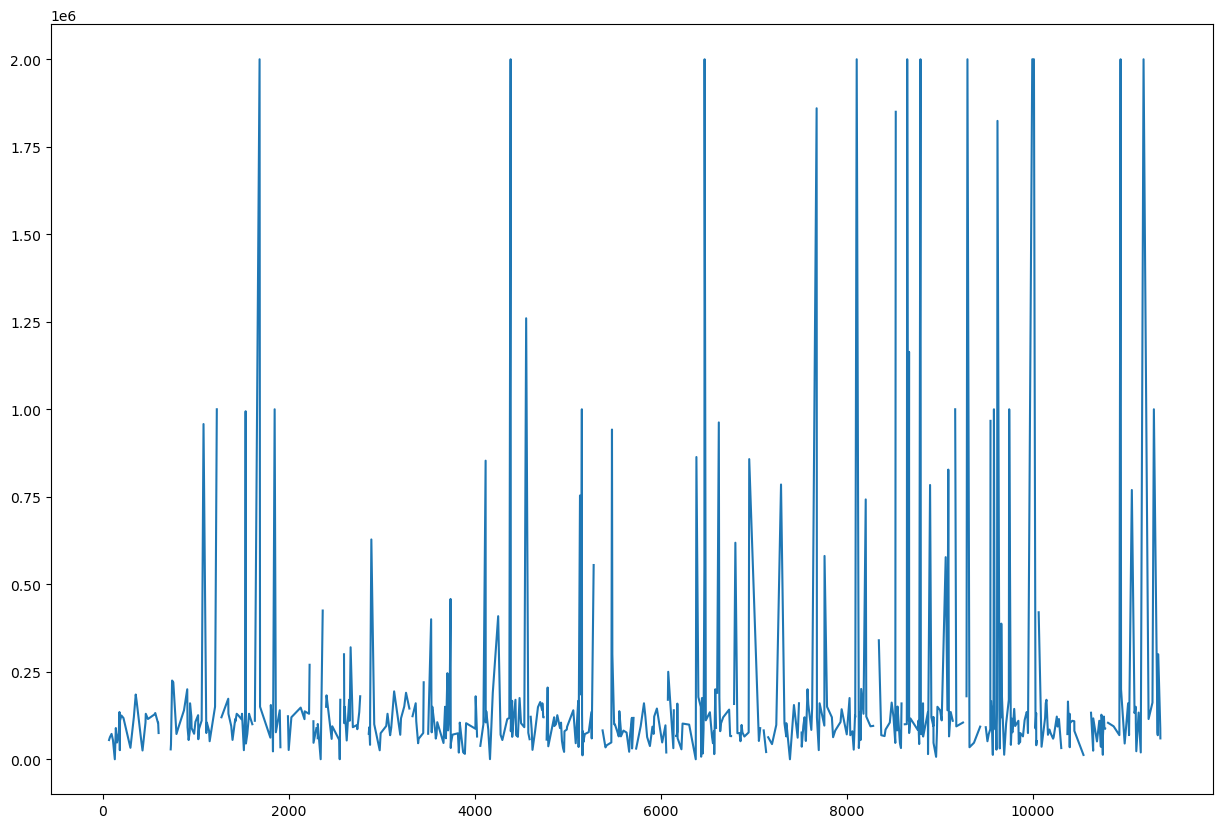

In [31]:
age2.ConvertedComp.plot(figsize=(15,10))
plt.show()

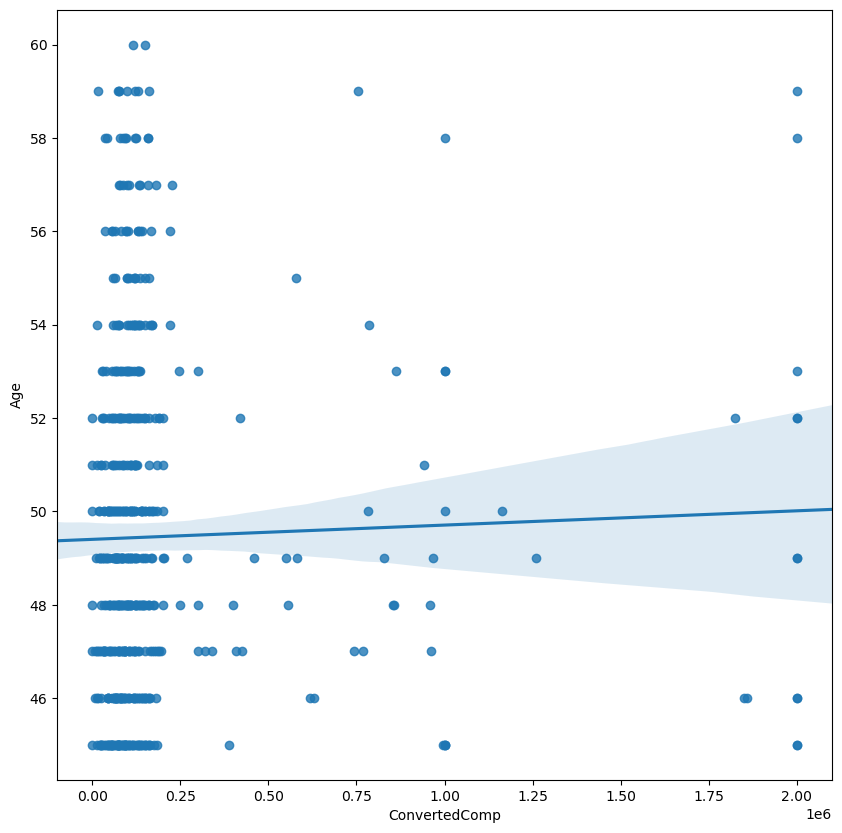

In [32]:
plt.figure(figsize=(10,10))
sns.regplot(x=age2.ConvertedComp,y=age2.Age)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [33]:
# your code goes here
df.MainBranch.value_counts()

I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

In [34]:
z = pd.DataFrame(df.MainBranch.value_counts())
z

,MainBranch
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


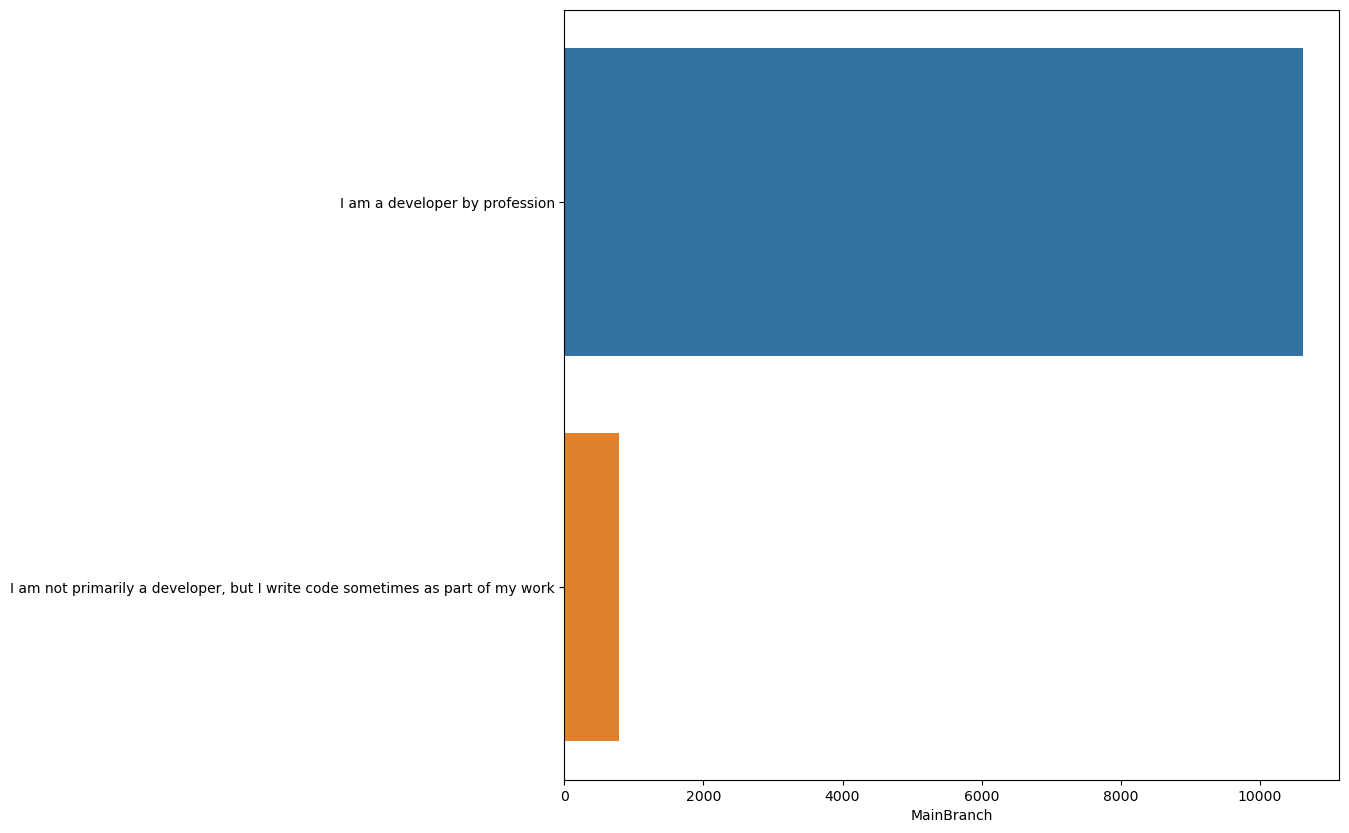

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(x=z.MainBranch,y=z.index, orient='h')
plt.show()

Close the database connection.


In [36]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
